In [1]:
# matplotlib notebook
import matplotlib.pyplot as plt, matplotlib as mpl
from matplotlib.animation import FuncAnimation
from astropy.io.fits import getdata
from scipy.signal import medfilt, medfilt2d
import os,sys

sys.path.insert(0, "..")
from bin.grism_tools_lib import grism_tools

In [2]:
plt.rcParams.update(mpl.rcParamsDefault)
mpl.use('nbAgg')
%matplotlib inline
# ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 
# 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 
# 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

In [3]:
fts_file = '../images/day084/3C273_2022_03_25_081559_6.fts'

if not os.path.exists(fts_file):
    print('FITS file %s not found, check name/path' % fts_file)

im, hdr = getdata(fts_file, 0, header=True)
grism_filter = hdr['FILTER'][0]
star = hdr['OBJECT']
print('Analyzing image %s, grism filter %s' % (fts_file,grism_filter))

Analyzing image ../images/day084/3C273_2022_03_25_081559_6.fts, grism filter 6


In [4]:
cal_directory = '../calibrations'  # Change as needed
cal_date = '2022_03_25'
cal_file = '%s/grism_cal_%s_%s.csv' % (cal_directory,grism_filter,cal_date)
if os.path.exists(cal_file):
    print('Found calibration file %s' % cal_file)
else:
    print('Calibration file %s not found' % cal_file)

Found calibration file ../calibrations/grism_cal_6_2022_03_25.csv


In [5]:
G = grism_tools(fts_file,cal_file=cal_file)

image, title, object, utdate, fil, telescope, instrument, z = G.header_params()
print(star,utdate,fil,telescope,instrument)

3C273 2022-03-25 08:15:59 6 Iowa Robotic Telescope SBIG Aluma AC4040


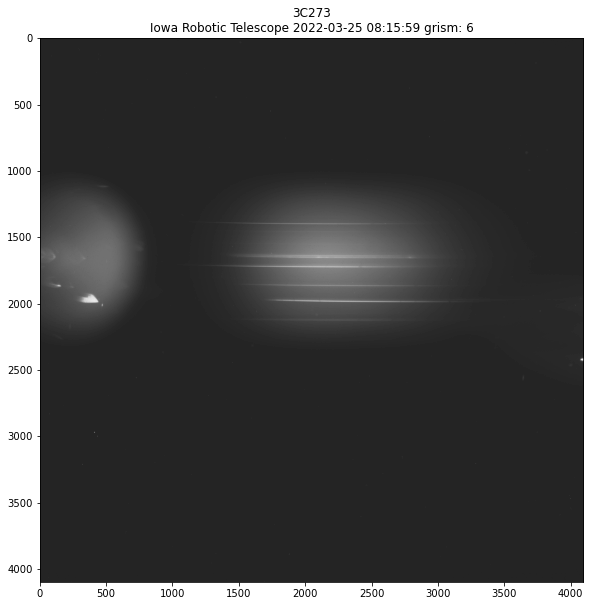

In [6]:
fig = G.plot_image(figsize =(10,10),cmap='gray')
plt.show()

In [ ]:
fig = G.plot_strip(cmap='jet')
plt.show()

In [ ]:
fig = G.plot_spectrum(calibrated = True, plot_balmer=True,title='', medavg = 3)
plt.show()

In [ ]:
fig,popt = G.fit_gaussian(651,661,emission=False)

print(popt)
plt.show()

In [ ]:
T = 10000

fig = G.plot_rectified_spectrum(T,wavemin=385,wavemax=700)
plt.show()

In [ ]:
ref_file = '../jacoby_spectra/HD64191-Jacoby-spec.csv'

fig = G.plot_2x2(ref_file=ref_file, medavg=5, xlims =[380,700])
plt.show()

In [ ]:
spectra = os.listdir('Red/')
medavg = 3

spectra.sort()
fig,ax = plt.subplots(1, 1, figsize=(10,6))
iterable, = ax.plot([], [])

def init():
    iterable.set_data([], [])
    return iterable,

def animate(i):
    G = grism_tools('Red/'+spectra[i],cal_file)
    jd,wave,amp = G.wave_params()
    iterable.set_data(wave, medfilt(amp, kernel_size=medavg))
    ax.set_title('V1405 Cas Timelapse\n JD: %.2f' % jd)
    return iterable,

ax.set_title('V1405 Cas Timelapse\n')
ax.set_xlabel('Wavelength [nm]'); ax.set_ylabel('Calibrated Amplitude')
ax.set_xlim(380, 720); ax.set_ylim(0, 0.5)

anim = FuncAnimation(fig, animate, init_func=init, frames=len(spectra), interval=500)
anim.save('V1405Cas_Red.mp4', writer = 'ffmpeg', fps = 2)